In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256 # width * height
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage',
    shuffle=True,
    image_size=(IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset) # 69*32 is approximately equal to full length

68

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape) # (number of immages,width,height,rgb)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 2 0 0 1 1 0 1 1 0 1 2 0 1 1 0 1 1]


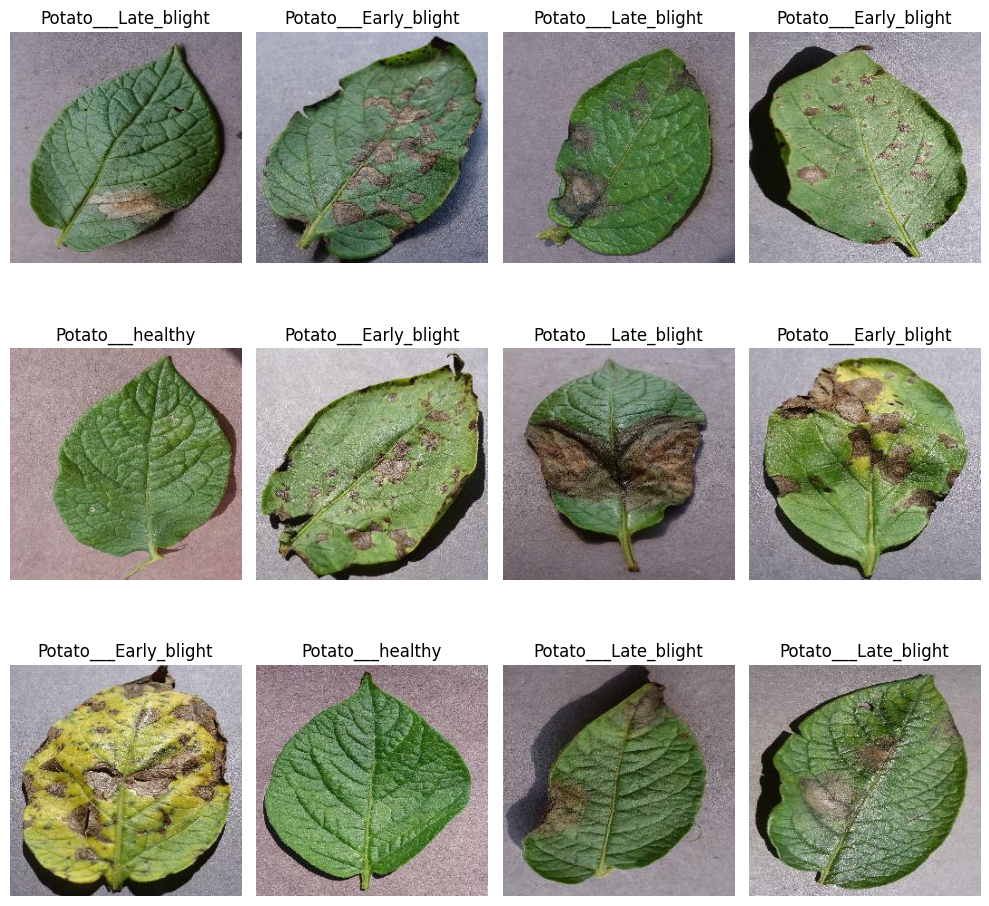

In [7]:
fig, axes = plt.subplots(3, 4, figsize=(10, 10))  # 3x4 grid for 12 images

for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = axes.flat[i]
        ax.imshow(image_batch[i].numpy().astype('uint8'))
        ax.set_title(class_names[label_batch[i]])
        ax.axis("off")

plt.tight_layout()
plt.show()


In [8]:
def get_dataset_pratitions(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)

    train_size = int(train_split*ds_size)
    val_size= int(val_split*ds_size)
    test_size= int(test_split*ds_size)
    
    train_ds =ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [9]:
train_ds,val_ds,test_ds = get_dataset_pratitions(dataset)

In [10]:
len(train_ds),len(val_ds),len(test_ds)

(54, 6, 8)

In [11]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# watch prefetach and cache tutorial in deep learning playlist

In [12]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE), # resize the image
    layers.Rescaling(1.0/255) # rescale the image between 0 and 1
])


In [13]:
#data augmentation - watch
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2),
])

In [14]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model =  models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape), # CNN layer
    layers.MaxPooling2D((2,2)), # Pooling layer
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'), 
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')   
])

model.build(input_shape=input_shape)

C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
) # train and stor details of each epochs

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.4844 - loss: 0.9451 - val_accuracy: 0.5104 - val_loss: 0.8044
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.5456 - loss: 0.8301 - val_accuracy: 0.7604 - val_loss: 0.5213
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7063 - loss: 0.6447 - val_accuracy: 0.8177 - val_loss: 0.4078
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.8046 - loss: 0.4708 - val_accuracy: 0.9010 - val_loss: 0.3476
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8573 - loss: 0.3378 - val_accuracy: 0.9010 - val_loss: 0.2620
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8957 - loss: 0.2650 - val_accuracy: 0.9010 - val_loss: 0.2027
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9131 - loss: 0.1987 - val_accuracy: 0.9427 - val_loss: 0.1181
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9207 - loss: 0.1916 - val_accuracy: 0.9740 - val_loss:

In [20]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.9986 - loss: 0.0123


In [21]:
history

In [23]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [24]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [25]:
history.history['accuracy']

[0.4704861044883728,
 0.6024305820465088,
 0.7291666865348816,
 0.8200231194496155,
 0.8582175970077515,
 0.8987268805503845,
 0.9091435074806213,
 0.9403935074806213,
 0.9409722089767456,
 0.9490740895271301,
 0.9618055820465088,
 0.9681712985038757,
 0.9728009104728699,
 0.9704861044883728,
 0.9791666865348816,
 0.9797453880310059,
 0.9652777910232544,
 0.9872685074806213,
 0.9739583134651184,
 0.9878472089767456,
 0.9693287014961243,
 0.9681712985038757,
 0.9855324029922485,
 0.9780092835426331,
 0.9693287014961243,
 0.9907407164573669,
 0.9895833134651184,
 0.9762731194496155,
 0.9861111044883728,
 0.9855324029922485,
 0.9733796119689941,
 0.9884259104728699,
 0.984375,
 0.9884259104728699,
 0.9907407164573669,
 0.9716435074806213,
 0.9913194179534912,
 0.9866898059844971,
 0.9884259104728699,
 0.9953703880310059,
 0.9733796119689941,
 0.9930555820465088,
 0.9913194179534912,
 0.9907407164573669,
 0.9872685074806213,
 0.9936342835426331,
 0.9918981194496155,
 0.9907407164573669,
 0

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss =  history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

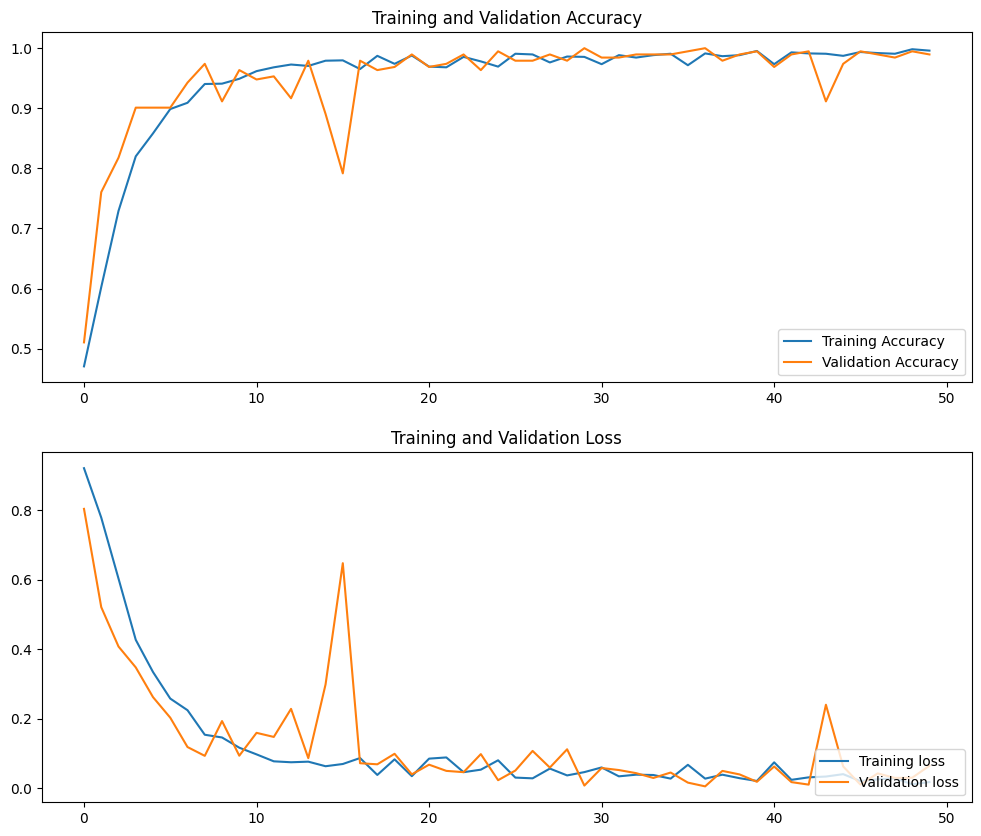

In [37]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
axes[0].plot(range(EPOCHS), acc, label='Training Accuracy')
axes[0].legend(loc='lower right')

axes[0].plot(range(EPOCHS), val_acc, label='Validation Accuracy')
axes[0].legend(loc='lower right')
axes[0].set_title("Training and Validation Accuracy")

print('\n')
axes[1].plot(range(EPOCHS), loss, label='Training loss')
axes[1].legend(loc='lower right')

axes[1].plot(range(EPOCHS), val_loss, label='Validation loss')
axes[1].legend(loc='lower right')
axes[1].set_title("Training and Validation Loss")


In [48]:
import numpy as np
np.argmax([0,5,2]) # return the index of maximum

1

First image to predict
First images's actual label:  Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Potato___Early_blight


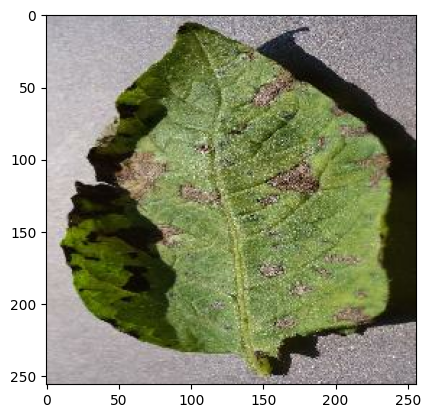

In [53]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    print("First images's actual label: ",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print(class_names[np.argmax(batch_prediction[0])]) # Since we have dense layer with three neurons. So it gives three probabilities.
    # so we need to take maximm.

In [70]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) # create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence =  round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


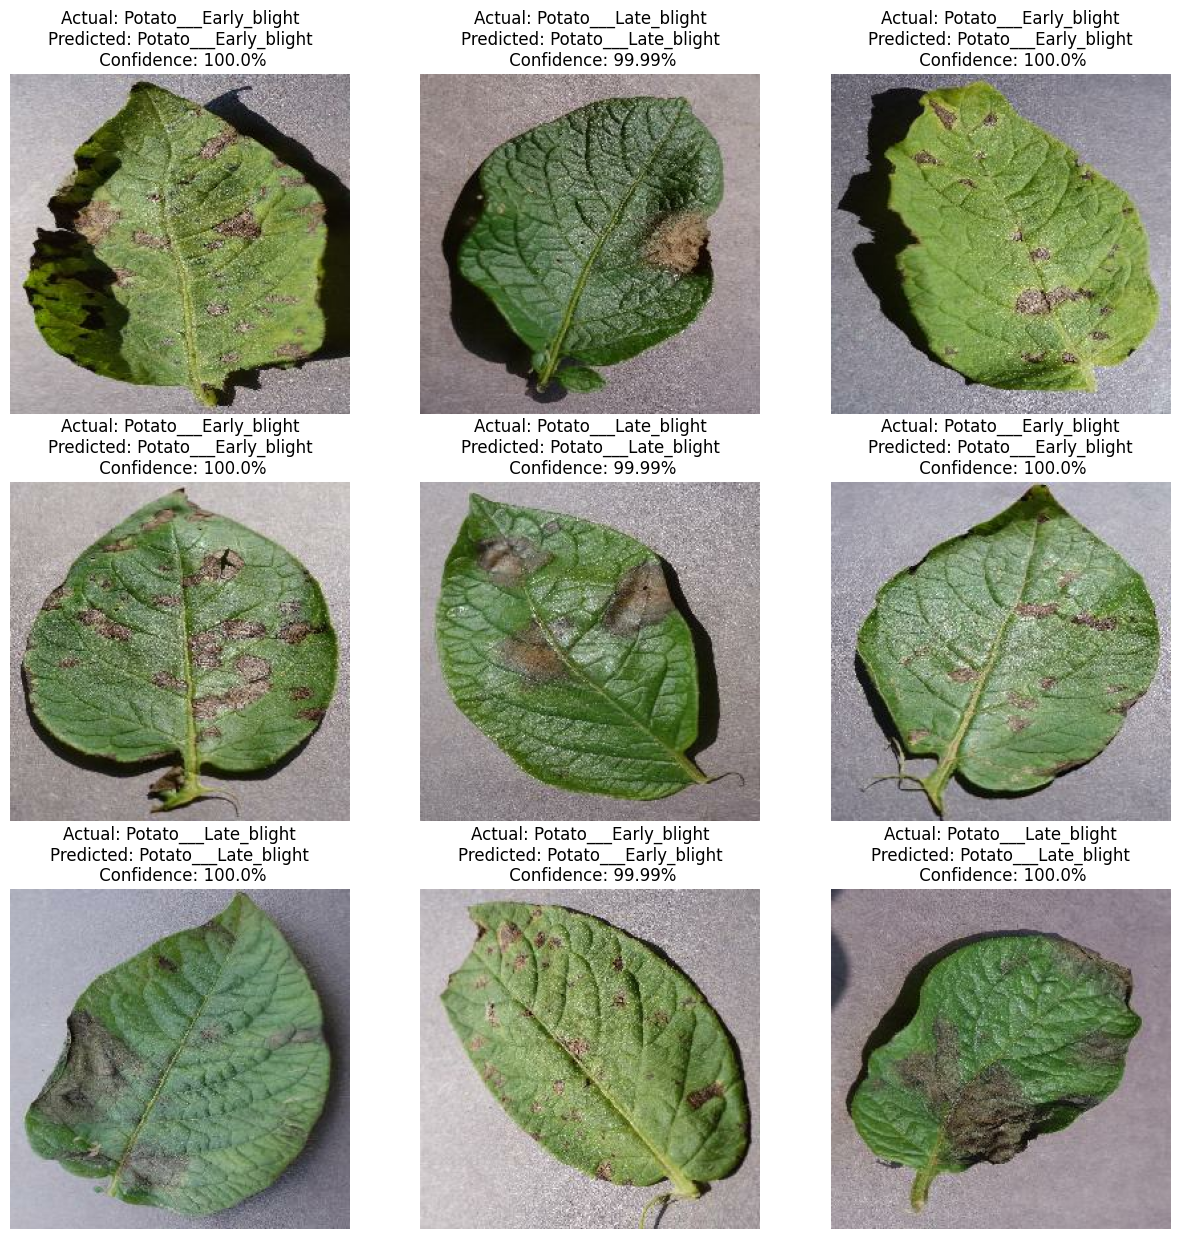

In [71]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\n Confidence: {confidence}%")
        
        plt.axis("off");

In [88]:
import os
files = os.listdir("../models")
versions  = [ int(f.replace(".keras",'')) for f in files if f.endswith(".keras")]

In [89]:
model_version= versions[-1] + 1 
model.save(f"../models/{model_version}.keras")